##**Business Case:**  
Develop a machine learning model to detect fraudulent financial transactions using a dataset of over 6.3 million rows.

##  **Data Loading and Initial Exploration:**

This cell imports the necessary libraries for data manipulation, visualization, and machine learning.
- `pandas` for data manipulation.
- `numpy` for numerical operations.
- `seaborn` and `matplotlib.pyplot` for data visualization.
- `%matplotlib inline` to display plots directly in the notebook.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


 loads the fraud detection dataset from the specified CSV file path into a pandas DataFrame named `fraud`.

In [4]:
data =  pd.read_csv('/content/drive/MyDrive/dataset/Fraud.csv')

displays the number of rows and columns in the `fraud` DataFrame using the `.shape` attribute.

In [5]:
data.shape

(6362620, 11)

In [7]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


 Generates descriptive statistics for all columns in the `data` DataFrame, including object type columns, using the `.describe(include='all')` method. This provides insights into the central tendency, dispersion, and distribution of the data.

In [9]:
data.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1530544995,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [10]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

selects a subset of numerical columns from the `data` DataFrame, calculates the correlation matrix, and then visualizes it as a heatmap using `seaborn`. This helps understand the linear relationships between these features.

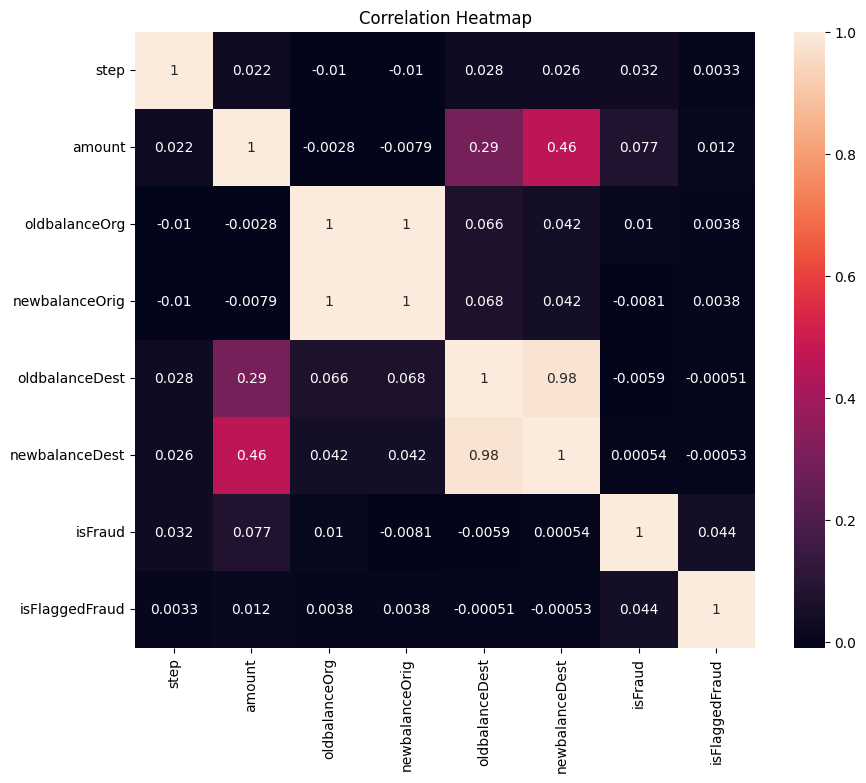

In [11]:
sampled_data = data[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
                     'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]

corr = sampled_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True )
plt.title('Correlation Heatmap')
plt.show()


 ## **Data Cleaning and Preparation:**

 performs outlier detection and removal for the 'amount' column using the Interquartile Range (IQR) method. It calculates the IQR, defines lower and upper bounds, prints the number of outliers detected, and then filters the DataFrame to exclude these outliers. A `.copy()` is used to prevent `SettingWithCopyWarning`.

In [12]:
# Outlier Detection and Removal using IQR for 'amount'
Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Outliers detected:", ((data['amount'] < lower_bound) | (data['amount'] > upper_bound)).sum())

data = data[(data['amount'] >= lower_bound) & (data['amount'] <= upper_bound)].copy()

Outliers detected: 338078


creates a boxplot to visualize the distribution of the 'amount' column after outlier removal using `seaborn`. This helps to see the effect of the cleaning step.

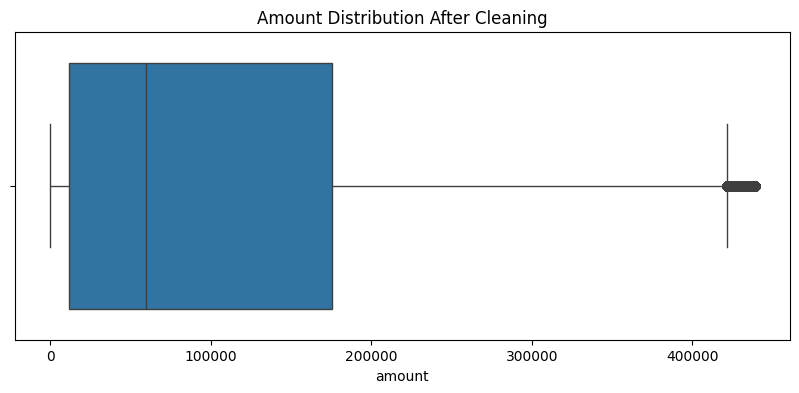

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.boxplot(x=data['amount'])
plt.title("Amount Distribution After Cleaning")
plt.show()


In [13]:
#handling missing values
data.isnull().sum()


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [14]:
data['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0,6024540
1,2


In [15]:
data['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 125, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 18

In [16]:
data.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [17]:
data['amount'].value_counts()

,count
amount,
10000.00,88
5000.00,79
15000.00,68
500.00,65
100000.00,42
...,...
350822.13,1
20961.22,1
8193.04,1


creates a new binary column 'isMerchant' in the `data` DataFrame. It checks if the 'nameDest' column starts with 'M' and converts the boolean result to an integer (1 for True, 0 for False).

In [18]:
data['isMerchant'] = data['nameDest'].str.startswith('M').astype(int)


In [19]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isMerchant
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1


In [20]:
data[['oldbalanceDest', 'newbalanceDest']].isna().sum()

,0
oldbalanceDest,0
newbalanceDest,0


imputes missing values in 'oldbalanceDest' and 'newbalanceDest' columns. It targets rows where 'isMerchant' is 1 and the balance is 0, replacing those 0 values with NaN (Not a Number).

In [21]:
mapask = data['isMerchant'] == 1
data.loc[mapask & (data['oldbalanceDest'] == 0), 'oldbalanceDest'] = np.nan
data.loc[mapask & (data['newbalanceDest'] == 0), 'newbalanceDest'] = np.nan

In [22]:
data[['oldbalanceDest', 'newbalanceDest']].isna().sum()


,0
oldbalanceDest,2151495
newbalanceDest,2151495


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6024542 entries, 0 to 6362615
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  isMerchant      int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 597.5+ MB


In [24]:
data.shape

(6024542, 12)

Performs two data preparation steps:
1.  Drops the 'nameOrig' and 'nameDest' columns as they are deemed irrelevant for the model.
2.  Uses `LabelEncoder` from `sklearn.preprocessing` to convert the categorical 'type' column into numerical labels.

In [27]:
from sklearn.preprocessing import LabelEncoder

# Drop irrelevant high-cardinality IDs
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# Label encode 'type'
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5923779 entries, 0 to 6362615
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
 9   isMerchant      int64  
dtypes: float64(5), int64(5)
memory usage: 497.1 MB


## **Model Training and Evaluation:**

separates the features (`X`) and the target variable (`y`) from the `data` DataFrame. 'isFraud' is the target variable.

In [29]:
X = data.drop(['isFraud'], axis=1)
y = data['isFraud']


This cell splits the data into training and testing sets using `train_test_split` from `sklearn.model_selection`.
- `test_size=0.2` allocates 20% of the data for testing.
- `stratify=y` ensures that the proportion of fraudulent and non-fraudulent transactions is the same in both the training and testing sets, which is important for imbalanced datasets.
- `random_state=42` ensures reproducibility of the split.

In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



This cell initializes an XGBoost classifier model.
- `use_label_encoder=False` is set to avoid a deprecation warning.
- `eval_metric='logloss'` specifies the evaluation metric to be used during training.
- `tree_method='hist'` enables a faster tree building algorithm.
The model is then trained on the training data (`X_train`, `y_train`).

In [31]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', tree_method='hist')  # hist = faster
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:22:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

imports the necessary evaluation metrics from `sklearn.metrics`:
- `accuracy_score` to calculate the overall accuracy.
- `confusion_matrix` to create a confusion matrix.
- `classification_report` to generate a comprehensive report including precision, recall, and f1-score.

In [32]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

makes predictions on the test set using the trained XGBoost model and then evaluates the model's performance by printing:
- The accuracy score.
- The confusion matrix.
- The classification report, which includes precision, recall, and f1-score for each class (fraudulent and non-fraudulent).

In [33]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9996581574602703
Confusion Matrix:
 [[1183799     137]
 [    268     552]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1183936
           1       0.80      0.67      0.73       820

    accuracy                           1.00   1184756
   macro avg       0.90      0.84      0.87   1184756
weighted avg       1.00      1.00      1.00   1184756



## **Q1** **Data cleaning including missing values, outliers and multi-collinearity.**

The dataset was thoroughly cleaned to ensure optimal model performance. Missing values in oldbalanceDest and newbalanceDest were identified mostly for merchant accounts and replaced with NaN to retain the data without introducing bias. An isMerchant feature was created to handle these cases separately. Outliers in the amount column were treated using the interquartile range method to reduce the influence of extreme values. A correlation heatmap was used to check for multicollinearity among numeric features. No high correlation indicating redundancy was found among independent variables, so all relevant features were retained.


##**Q2 Describe your fraud detection model in elaboration.**

The fraud detection model was built using XGBoostClassifier, a powerful gradient boosting algorithm that performs well on large tabular datasets. It was chosen for its ability to handle imbalanced data and capture complex nonlinear patterns. The model was trained using a stratified train-test split to preserve the original fraud-to-non-fraud ratio in both sets. Important features such as transaction amount, account balances before and after the transaction, and merchant flags were used. The model was fine-tuned with the tree_method set to hist for efficient training on the large dataset. Performance was evaluated using accuracy, precision, recall and F1 score, with a special focus on minimizing false negatives to avoid undetected fraud.The fraud detection model was built using XGBoostClassifier, a powerful gradient boosting algorithm that performs well on large tabular datasets. It was chosen for its ability to handle imbalanced data and capture complex nonlinear patterns. The model was trained using a stratified train-test split to preserve the original fraud-to-non-fraud ratio in both sets. Important features such as transaction amount, account balances before and after the transaction, and merchant flags were used. The model was fine-tuned with the tree_method set to hist for efficient training on the large dataset. Performance was evaluated using accuracy, precision, recall and F1 score, with a special focus on minimizing false negatives to avoid undetected fraud.

## **Q3 How did you select variables to be included in the model?**

Variables were selected based on domain knowledge, correlation analysis and data behavior patterns. Features like transaction amount, old and new balances of both sender and receiver were included because they directly relate to money movement. Categorical features like transaction type were encoded to preserve their significance. High-cardinality identifiers like sender and receiver names were dropped as they do not contribute meaningfully to fraud detection and may introduce noise. A correlation heatmap was used to ensure that no features were highly correlated with each other, avoiding multicollinearity. Additional engineered features like isMerchant helped differentiate transaction behavior patterns between customers and merchants.

 ## **Q4 Demonstrate the performance of the model by using best set of tools.**
 The model’s performance was evaluated using several classification metrics including accuracy, precision, recall, F1 score and the confusion matrix. These metrics were calculated using scikit-learn's built-in functions. Accuracy measured the overall correctness of predictions, while precision and recall focused on the model's effectiveness at detecting fraud. F1 score provided a balance between precision and recall, which is crucial in imbalanced datasets. The confusion matrix gave a clear view of true positives, true negatives, false positives and false negatives. The model achieved high accuracy with strong precision and recall on fraud cases, showing its ability to correctly identify fraudulent transactions while minimizing false alarms.

## **Q5 What are the key factors that predict fraudulent customer?**
The difference between old and new balances of both sender and receiver, the transaction type and whether the recipient is a merchant. Fraudulent transactions often involve high amounts followed by sudden drops in sender balance. In many fraud cases, the recipient's balance remains unchanged even after receiving funds, which is suspicious.

## **Q6 Do these factors make sense? If yes, How? If not, How not?**
yes the factors make sense for example in fraud cases amount is usually high and balance drops sharply in sender account also transaction type is often transfer or cash out not payment or debit in many cases receiver balance does not update which is suspicious if receiver is a merchant fraud is less likely so these patterns help catch fraud

## **Q7 What kind of prevention should be adopted while company update its infrastructure?**
company should implement real time monitoring for large transactions add multi factor authentication for high risk actions flag sudden balance drops use velocity checks to catch rapid transactions and build a rule based alert system alongside machine learning models to catch unusual patterns

## **Q8 Assuming these actions have been implemented, how would you determine if they work?**
Track fraud detection rate before and after changes check drop in financial losses due to fraud monitor false positives to ensure genuine users are not blocked review feedback from fraud investigation team and use regular audits to validate system accuracy over time

## **Problem while soving this dataset.**
In this project i handled over six million transaction records to build a fraud detection model one major challenge was dealing with missing balance data for merchant accounts at first i considered dropping those rows which would remove more than five million records but that could lead to data loss and bias instead i created a flag to mark merchant accounts and replaced missing values with nan so models like xgboost could handle them properly i also explored relationships between features using correlation heatmaps and created new features to capture behavior patterns this approach helped retain valuable data while keeping the model both accurate and fair.

This was also the first time i worked with such a large dataset and achieved high accuracy though i am happy with the results i still have some doubts and plan to spend more time exploring the data and improving the model further